__Start with importing the necessary packages__

In [1]:
import pandas as pd
from numpy import percentile,quantile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Read the train and test datasets to dataframes 
df = pd.read_csv("../input/rental-price-of-indias-it-capital-pune-mh-ind/train.csv")
df_test = pd.read_csv("../input/rental-price-of-indias-it-capital-pune-mh-ind/test.csv")

In [3]:
#Display the maximum number of columsn using pandas package
pd.set_option("display.max_columns",500)

In [4]:
#Read the first 5 rows of df
df.head(5)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,No,0,None,None,11,2,0,2,5 to 10 Year Old,1,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,Yes,2,None,None,11,1,0,2,1 to 5 Year Old,1,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,No,1,None,None,11,1,0,2,1 to 5 Year Old,0,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,Family Only,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Mosaic,Yes,No,1,None,None,11,1,0,0,10+ Year Old,1,0,0,0,0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Family , Bachelors (Men Only)","Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Polished concrete,Yes,Yes,1,None,None,12,1,1,1,1 to 5 Year Old,1,0,0,0,0,0,0,0,20,0.0,7500.0


In [5]:
#Read the first 2 rows of test dataset
df_test.head(2)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,no_room,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,0.0,Semifurnished,All,"Bella Casa Baner, Baner, , Pune, Maharashtra",1,No Direction,Not provided,No,No,1,None,None,0,0,1,0,1 to 5 Year Old,1,0,0,0,0,0,0,0,0,0.0,18500.0
1,2,2,1050.0,Semifurnished,All,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",2,West,Not provided,Yes,Yes,1,Yes,Yes,24,1,0,1,0 to 1 Year Old,1,0,0,0,0,0,0,0,63000,0.0,21000.0


In [6]:
# Read the columns present in the dataset
df.columns

Index(['bedroom', 'bathrooms', 'area', 'furnishing', 'avalable_for', 'address',
       'floor_number', 'facing', 'floor_type', 'gate_community', 'corner_pro',
       'parking', 'wheelchairadption', 'petfacility', 'aggDur', 'noticeDur',
       'lightbill', 'powerbackup', 'propertyage', 'no_room', 'pooja_room',
       'study_room', 'others', 'servant_room', 'store_room', 'maintenance_amt',
       'brok_amt', 'deposit_amt', 'mnt_amt', 'rent'],
      dtype='object')

In [7]:
#Print the datatypes for feature values in the dataset
df.dtypes

bedroom                int64
bathrooms              int64
area                 float64
furnishing            object
avalable_for          object
address               object
floor_number           int64
facing                object
floor_type            object
gate_community        object
corner_pro            object
parking                int64
wheelchairadption     object
petfacility           object
aggDur                 int64
noticeDur              int64
lightbill              int64
powerbackup            int64
propertyage           object
no_room                int64
pooja_room             int64
study_room             int64
others                 int64
servant_room           int64
store_room             int64
maintenance_amt       object
brok_amt               int64
deposit_amt            int64
mnt_amt              float64
rent                 float64
dtype: object

In [8]:
df.shape

(10884, 30)

In [9]:
#Print the numeric/float features and object/string type variables

num_cols = [feature for feature in df.columns if df[feature].dtypes!='O']
cat_cols = [feature for feature in df.columns if df[feature].dtypes=='O']

In [10]:
print("The numeric columns are : {}".format(num_cols)+"\n"*2+"The categorical columns are : {}".format(cat_cols))

The numeric columns are : ['bedroom', 'bathrooms', 'area', 'floor_number', 'parking', 'aggDur', 'noticeDur', 'lightbill', 'powerbackup', 'no_room', 'pooja_room', 'study_room', 'others', 'servant_room', 'store_room', 'brok_amt', 'deposit_amt', 'mnt_amt', 'rent']

The categorical columns are : ['furnishing', 'avalable_for', 'address', 'facing', 'floor_type', 'gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'propertyage', 'maintenance_amt']


*Describe about the numerical columns using 5 point stats*

In [11]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
bedroom,10884.0,1.797868,8.073283e-01,1.0,1.0,2.0,2.0,22.0
bathrooms,10884.0,1.779677,8.322314e-01,1.0,1.0,2.0,2.0,22.0
area,10884.0,528.558560,9.304609e+02,0.0,0.0,510.0,840.0,72775.0
floor_number,10884.0,3.062018,2.390430e+00,0.0,1.0,3.0,5.0,9.0
parking,10884.0,0.884693,5.594567e-01,0.0,1.0,1.0,1.0,9.0
aggDur,10884.0,7.423649,7.670543e+00,0.0,0.0,11.0,11.0,36.0
noticeDur,10884.0,0.722345,6.989659e-01,0.0,0.0,1.0,1.0,6.0
lightbill,10884.0,0.172639,3.779520e-01,0.0,0.0,0.0,0.0,1.0
powerbackup,10884.0,0.712422,8.426668e-01,0.0,0.0,0.0,2.0,2.0
no_room,10884.0,0.750276,4.328733e-01,0.0,1.0,1.0,1.0,1.0


*Describe about the categorical variables*

In [12]:
df[cat_cols].describe().T

,count,unique,top,freq
furnishing,10884,4,Unfurnished,4758
avalable_for,10884,8,All,5391
address,10884,6387,"Paranjape Blue Ridge, Hinjewadi, , Pune, Mahar...",71
facing,10884,9,East,3963
floor_type,10884,15,Not provided,4344
gate_community,10884,2,Yes,6366
corner_pro,10884,2,No,9353
wheelchairadption,10884,2,None,8940
petfacility,10884,2,None,8458
propertyage,10884,6,1 to 5 Year Old,3744


*Check for any NaN values present in the dataset*

<AxesSubplot:>

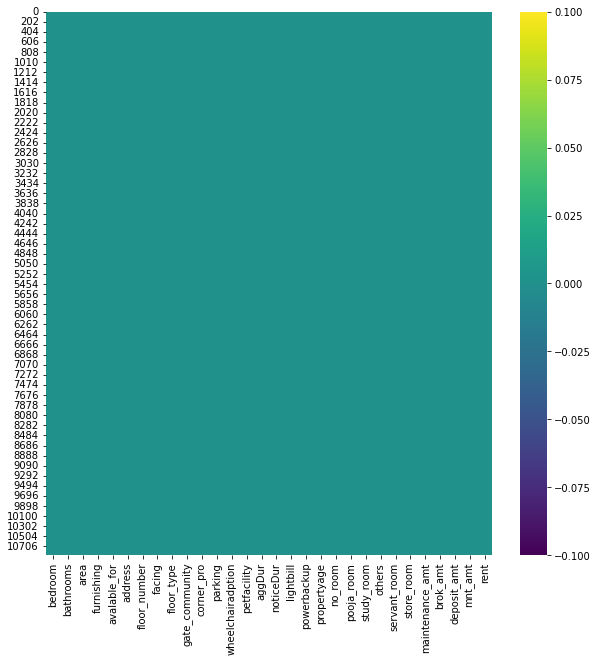

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(),cmap="viridis")

In [14]:
df.isnull().sum()

bedroom              0
bathrooms            0
area                 0
furnishing           0
avalable_for         0
address              0
floor_number         0
facing               0
floor_type           0
gate_community       0
corner_pro           0
parking              0
wheelchairadption    0
petfacility          0
aggDur               0
noticeDur            0
lightbill            0
powerbackup          0
propertyage          0
no_room              0
pooja_room           0
study_room           0
others               0
servant_room         0
store_room           0
maintenance_amt      0
brok_amt             0
deposit_amt          0
mnt_amt              0
rent                 0
dtype: int64

_Print the unique categories count in numeric variables_

In [15]:
l1,l2=list(),list()
for ele in num_cols:
    l1.append(ele)
    l2.append(len(df[ele].unique()))
dict1 = {'Numeric_column':l1,"Count_of_unique_vals":l2}
num_uniq = pd.DataFrame(dict1)
num_uniq

,Numeric_column,Count_of_unique_vals
0,bedroom,10
1,bathrooms,9
2,area,931
3,floor_number,10
4,parking,9
5,aggDur,25
6,noticeDur,7
7,lightbill,2
8,powerbackup,3
9,no_room,2


In [16]:
#Print the unique values for those numerical features where their respective count is <=10 in dataset
my_dict = {ele:list(df[ele].unique()) for ele in num_cols }
new_dict = {}
for (k,v) in my_dict.items():
    if len(v)<=10:
        new_dict[k]=v
print(new_dict)

{'bedroom': [2, 3, 1, 4, 22, 10, 5, 7, 6, 20], 'bathrooms': [2, 3, 1, 4, 5, 22, 6, 7, 20], 'floor_number': [5, 1, 3, 6, 2, 7, 0, 8, 4, 9], 'parking': [0, 2, 1, 3, 4, 5, 8, 9, 6], 'noticeDur': [2, 1, 0, 3, 6, 5, 4], 'lightbill': [0, 1], 'powerbackup': [2, 0, 1], 'no_room': [1, 0], 'pooja_room': [0, 1], 'study_room': [0, 1], 'others': [0, 1], 'servant_room': [0, 1], 'store_room': [0, 1]}


In [17]:
for ele in num_cols:
    print("The no. of unique value counts in"+"\n" + "{} are:\n{}\n".format(ele,df[ele].value_counts()))

The no. of unique value counts in
bedroom are:
2     4936
1     4219
3     1504
4      202
5       17
7        2
22       1
10       1
6        1
20       1
Name: bedroom, dtype: int64

The no. of unique value counts in
bathrooms are:
2     5018
1     4348
3     1235
4      192
5       67
6       18
7        4
22       1
20       1
Name: bathrooms, dtype: int64

The no. of unique value counts in
area are:
0.00       4052
500.00      287
550.00      285
1000.00     269
800.00      259
           ... 
436.00        1
992.00        1
56.84         1
94.50         1
563.00        1
Name: area, Length: 931, dtype: int64

The no. of unique value counts in
floor_number are:
1    2462
2    1748
3    1515
0    1180
4    1165
5     933
6     678
7     531
9     338
8     334
Name: floor_number, dtype: int64

The no. of unique value counts in
parking are:
1    8063
0    2121
2     604
3      53
4      26
5      12
6       3
8       1
9       1
Name: parking, dtype: int64

The no. of unique value 

*It seems like there are some outlier values with respect to the numerical feature values*

In [18]:
#EDA
def plot_distplot(val):
    plt.figure(figsize=(10,10))
    sns.distplot(val,hist=True,kde=True,color="blue")
    plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


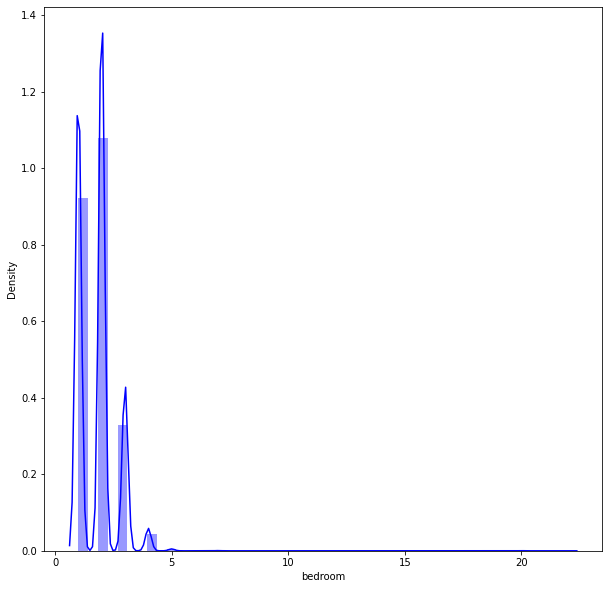

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


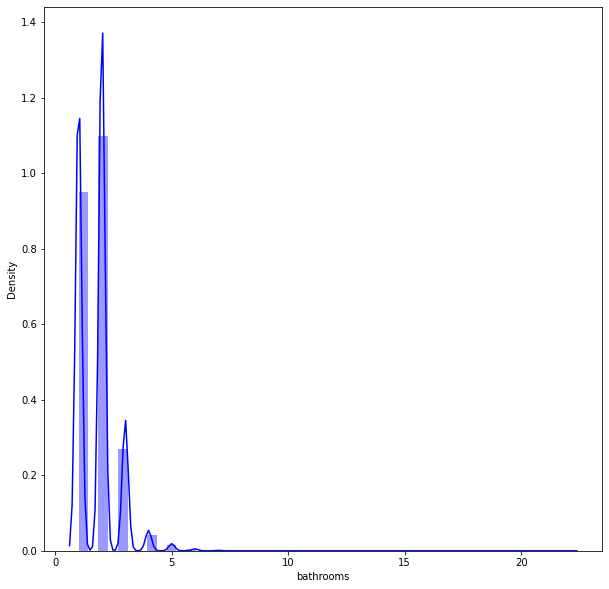

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


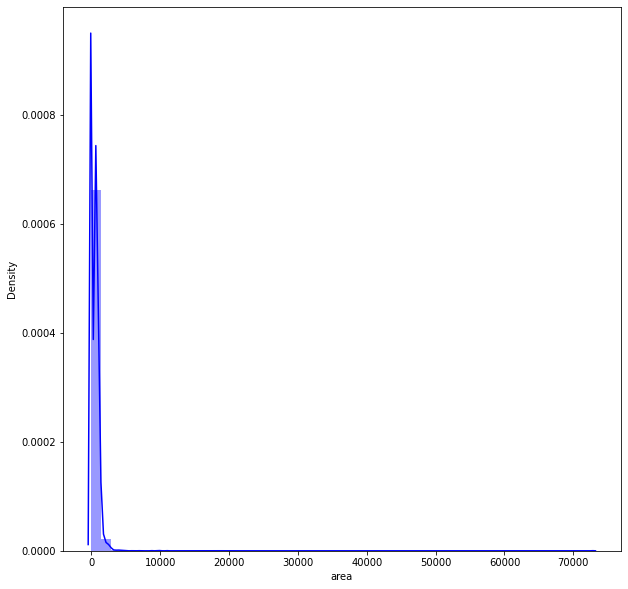

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


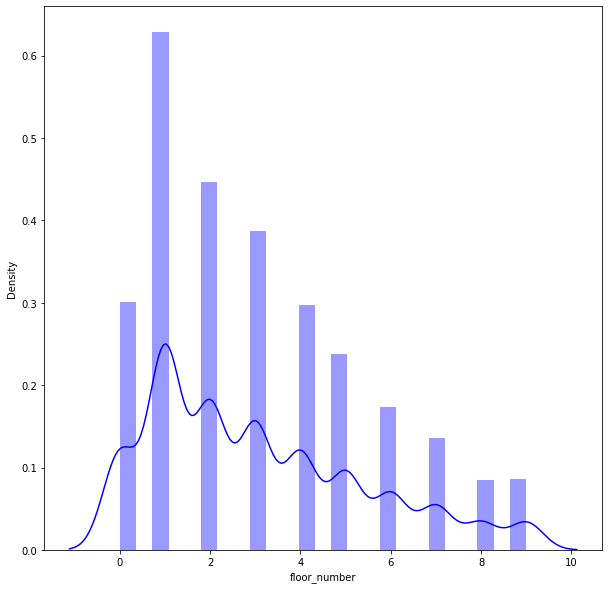

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


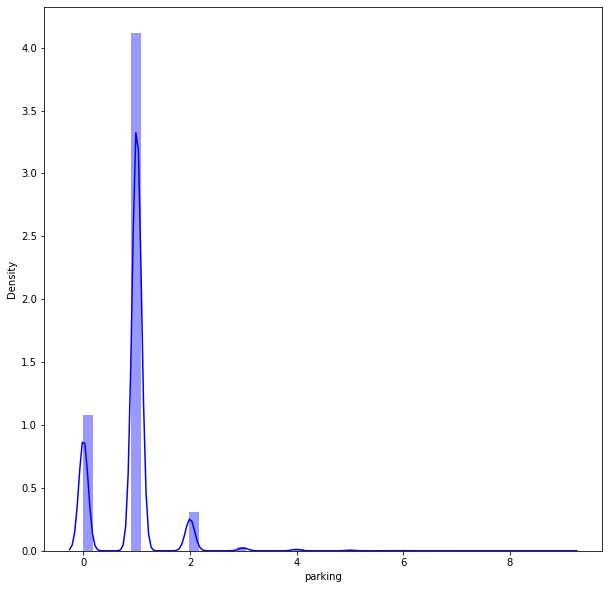

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


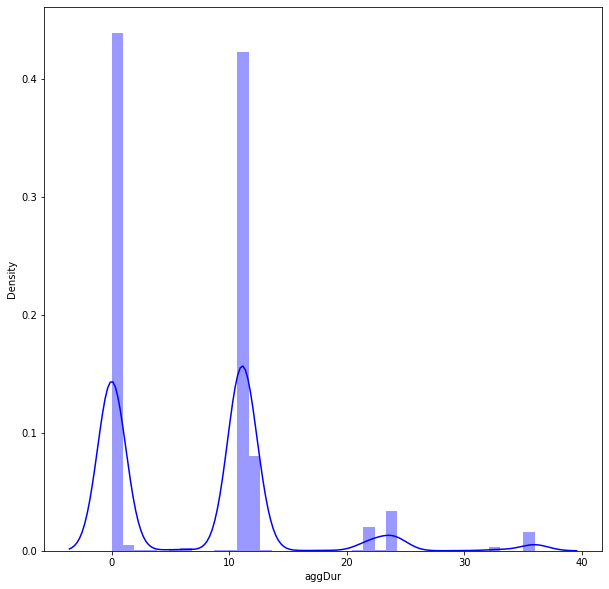

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


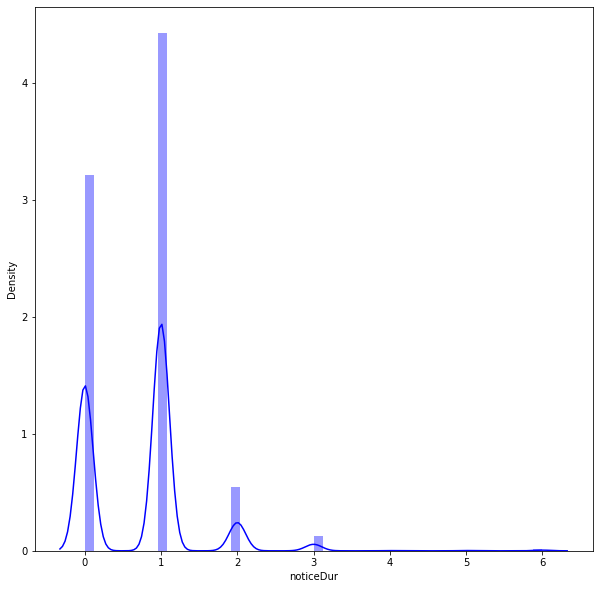

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


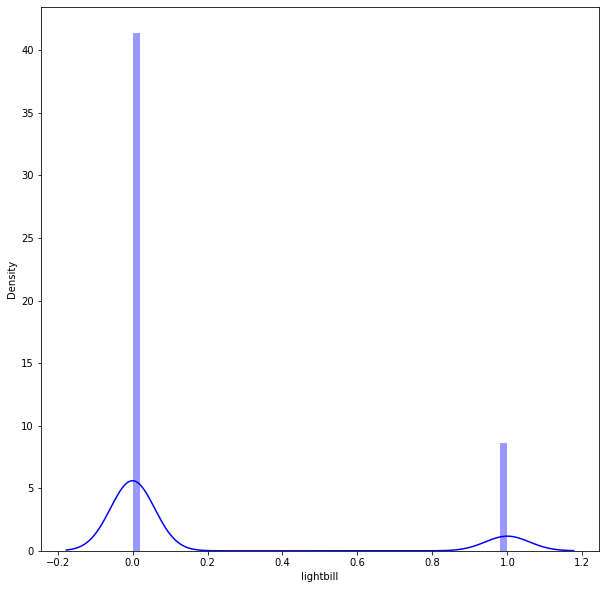

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


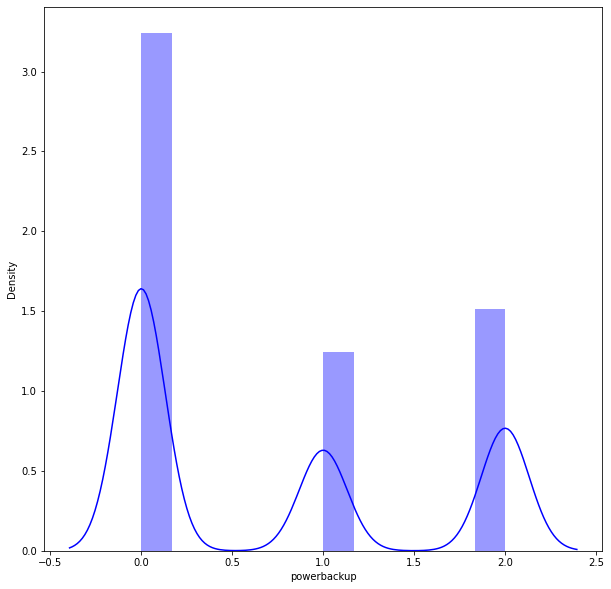

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


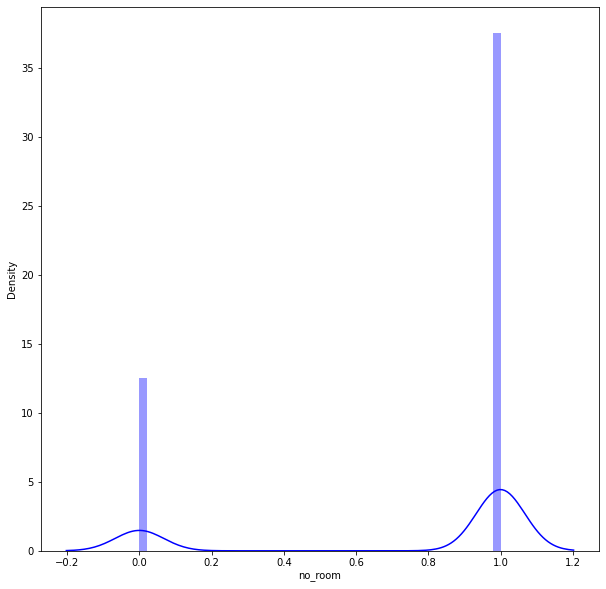

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


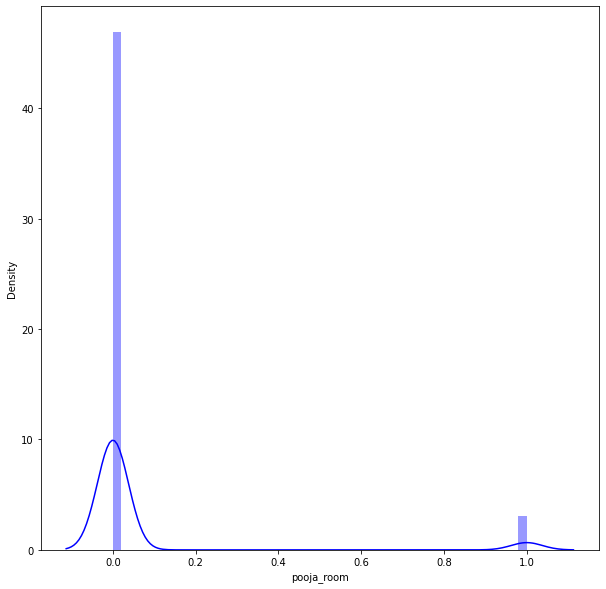

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


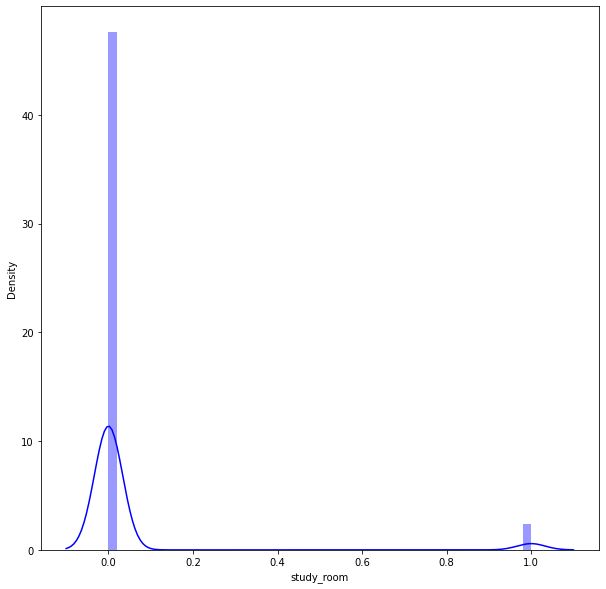

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


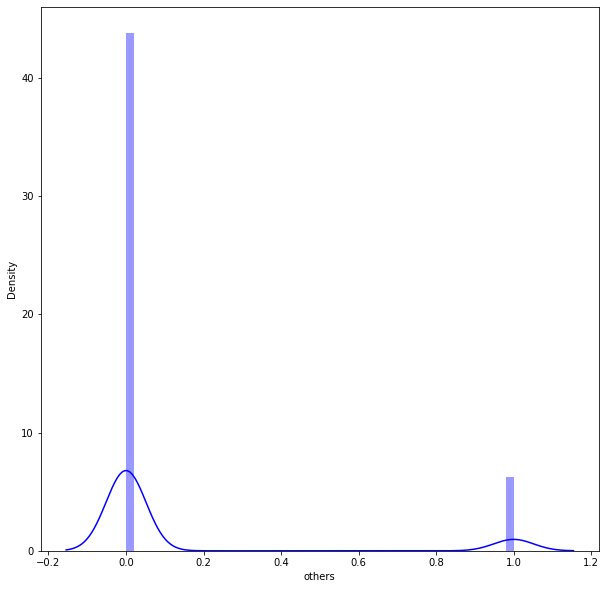

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


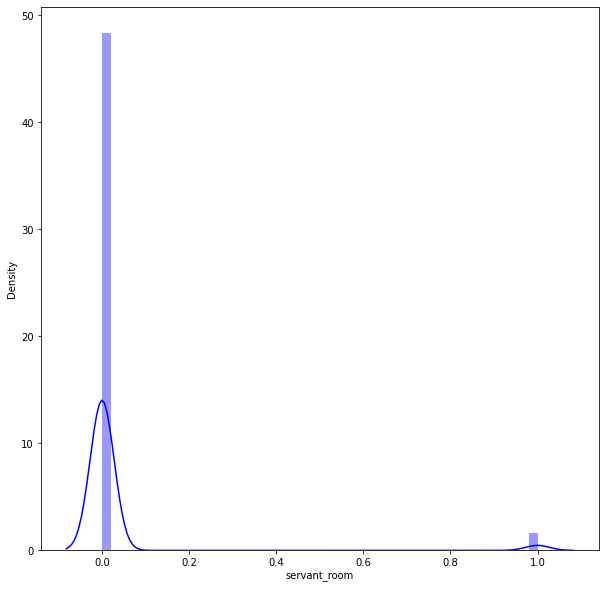

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


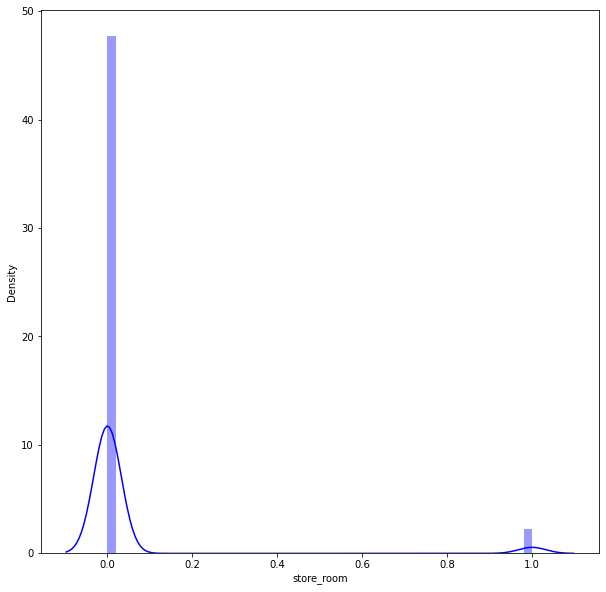

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


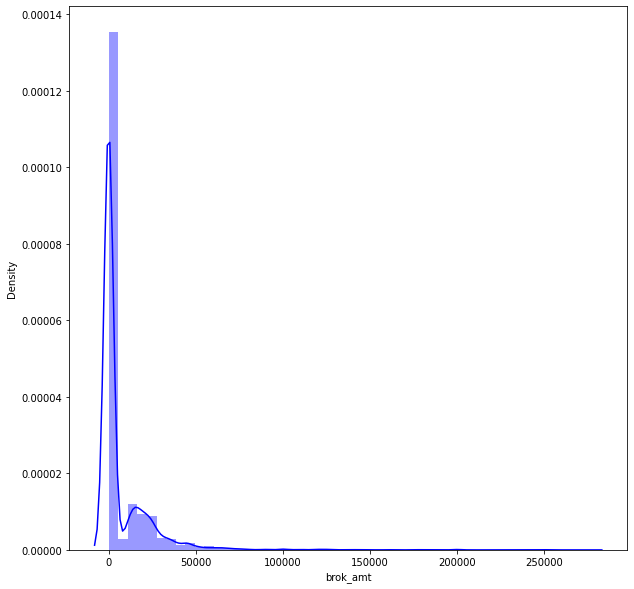

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


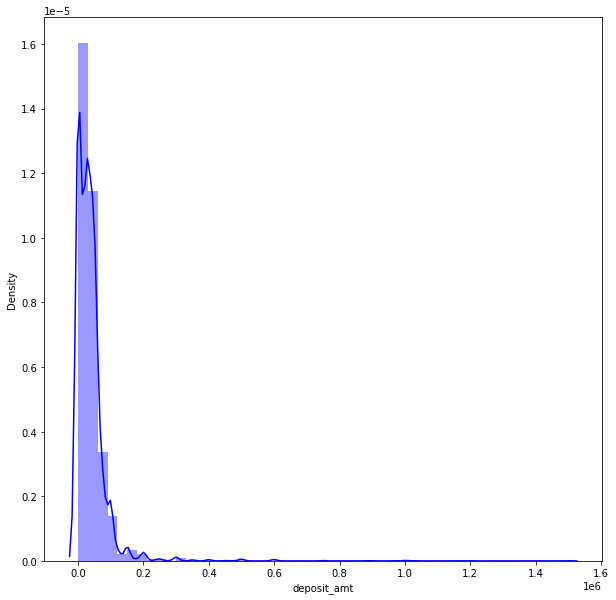

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


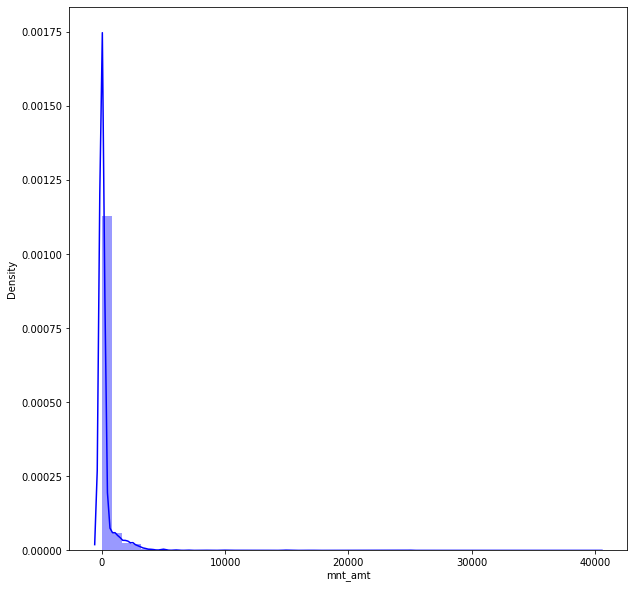

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


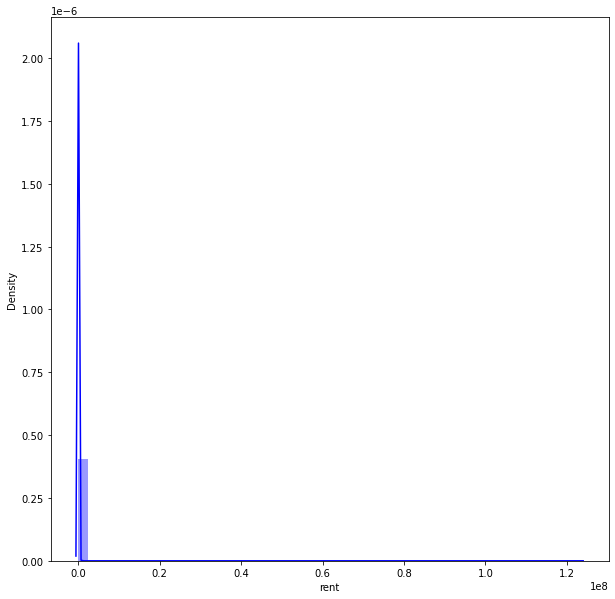

In [19]:
for ele in num_cols:
    plot_distplot(df[ele])

**After analysis the value counts for each numerical features we drop some rows 
with unrealistic values for those features** 

In [20]:
new_df = df.copy()

In [21]:
new_df.drop(list(new_df[new_df["bathrooms"]>3].index),axis=0,inplace=True)
new_df.drop(list(new_df[new_df["bedroom"]>4].index),axis=0,inplace=True)
new_df.shape

(10600, 30)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

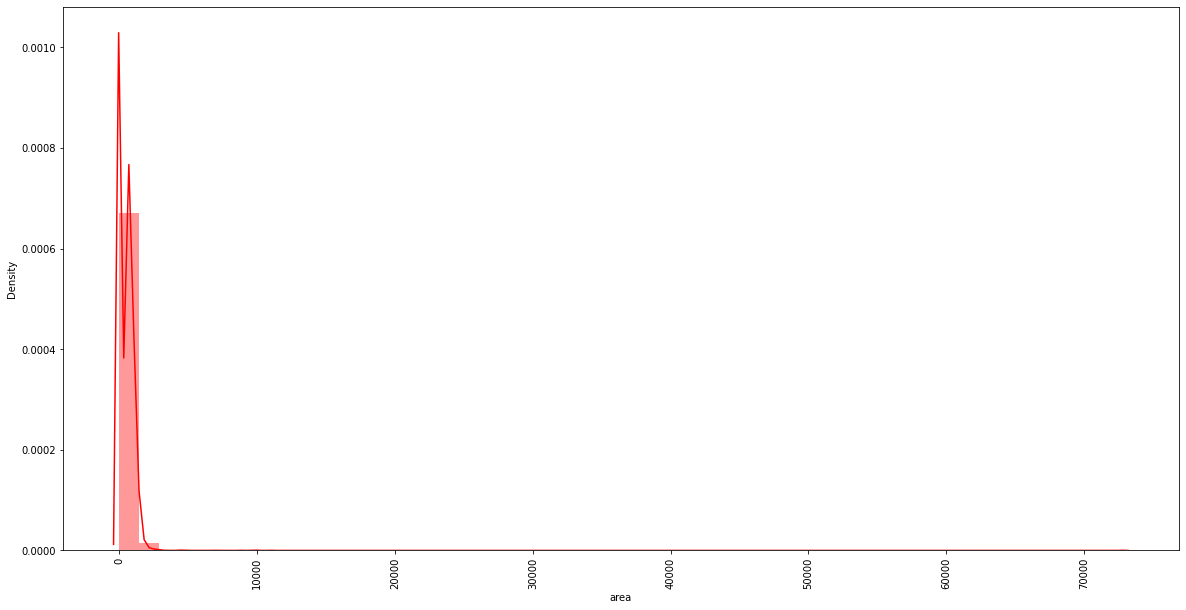

In [22]:
plt.figure(figsize=(20,10))
sns.distplot(new_df.area,color="red",kde=True)
plt.xticks(rotation=90)

In [23]:
# Extreme point 3 std away from mean considered as upper limit
upper_limit = np.mean(df.area)+3*np.std(df.area)
lower_limit = np.percentile(df.area,45)
print(lower_limit,upper_limit)

450.0 3319.8131278841925


In [24]:
new_df = new_df[(new_df["area"]>lower_limit) & (new_df["area"]<upper_limit)]
new_df.shape

(5813, 30)

In [25]:
upper_limit = np.percentile(df.aggDur,95)
lower_limit = 1
new_df = new_df[(new_df.aggDur>=1) &(new_df.aggDur<upper_limit)]
new_df.shape

(3837, 30)

In [26]:
upper_limit = np.mean(new_df.deposit_amt)+3*np.std(new_df.deposit_amt)
lower_limit = 1100
print(lower_limit,upper_limit)
new_df=new_df[(new_df.deposit_amt>1100) & (new_df.deposit_amt<upper_limit)]
new_df.shape

1100 159519.93786796823


(2847, 30)

In [27]:
new_df["total_rooms"]=0
rooms = [ele for ele in new_df.columns if "room" in ele]
new_df["total_rooms"] = new_df["bedroom"]+new_df["bathrooms"]+new_df["no_room"]+new_df["pooja_room"]+\
                        new_df["study_room"]+new_df["store_room"]+new_df["servant_room"]
rooms.remove("total_rooms")
new_df.drop(rooms,axis=1,inplace=True)
new_df.shape

(2847, 24)

<AxesSubplot:xlabel='total_rooms', ylabel='rent'>

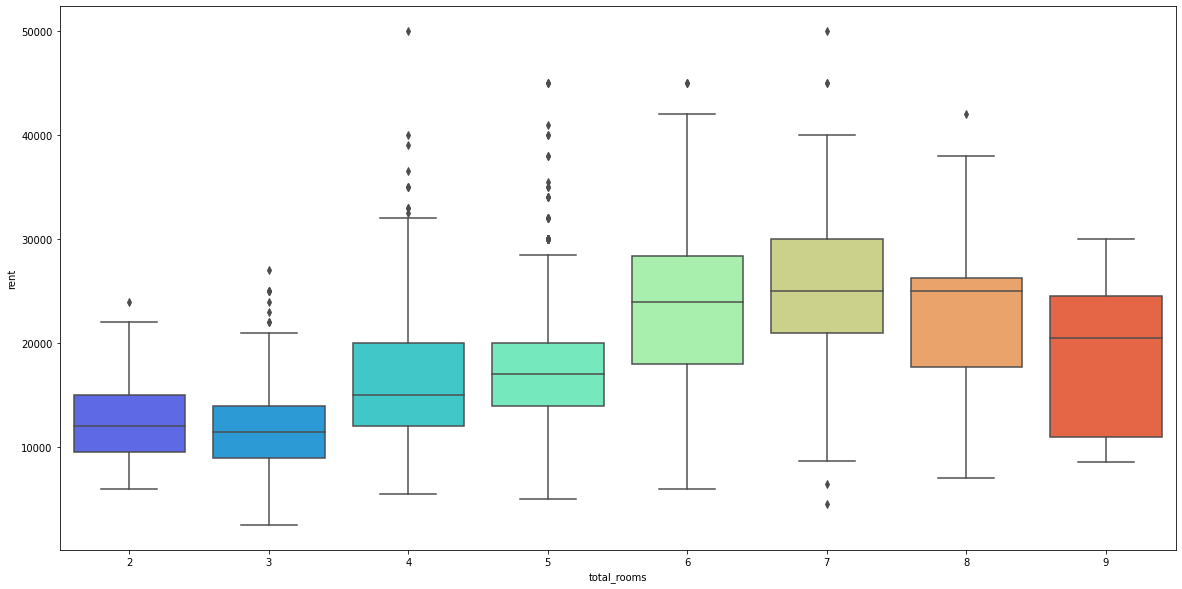

In [28]:
plt.figure(figsize=(20,10))
sns.boxplot(x=new_df.total_rooms,y=new_df.rent,orient="v",palette="rainbow")


<AxesSubplot:xlabel='aggDur', ylabel='rent'>

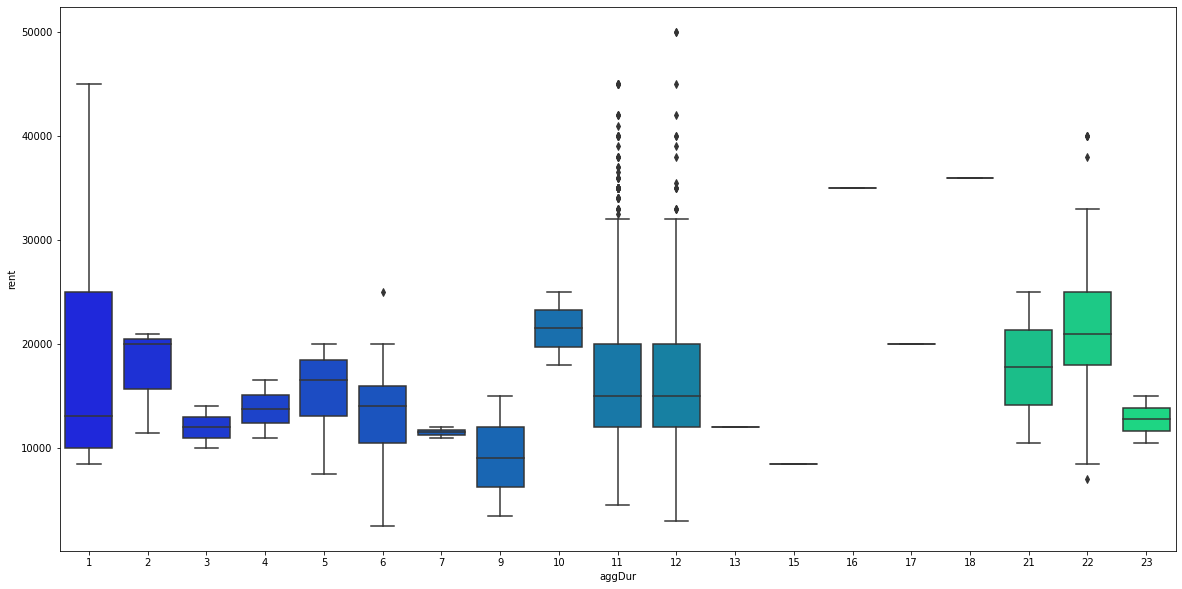

In [29]:
plt.figure(figsize=(20,10))
sns.boxplot(x=new_df.aggDur,y=new_df.rent,orient="v",palette="winter")


/opt/conda/lib/python3.7/site-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


(array([-20000.,      0.,  20000.,  40000.,  60000.,  80000., 100000.,
        120000., 140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

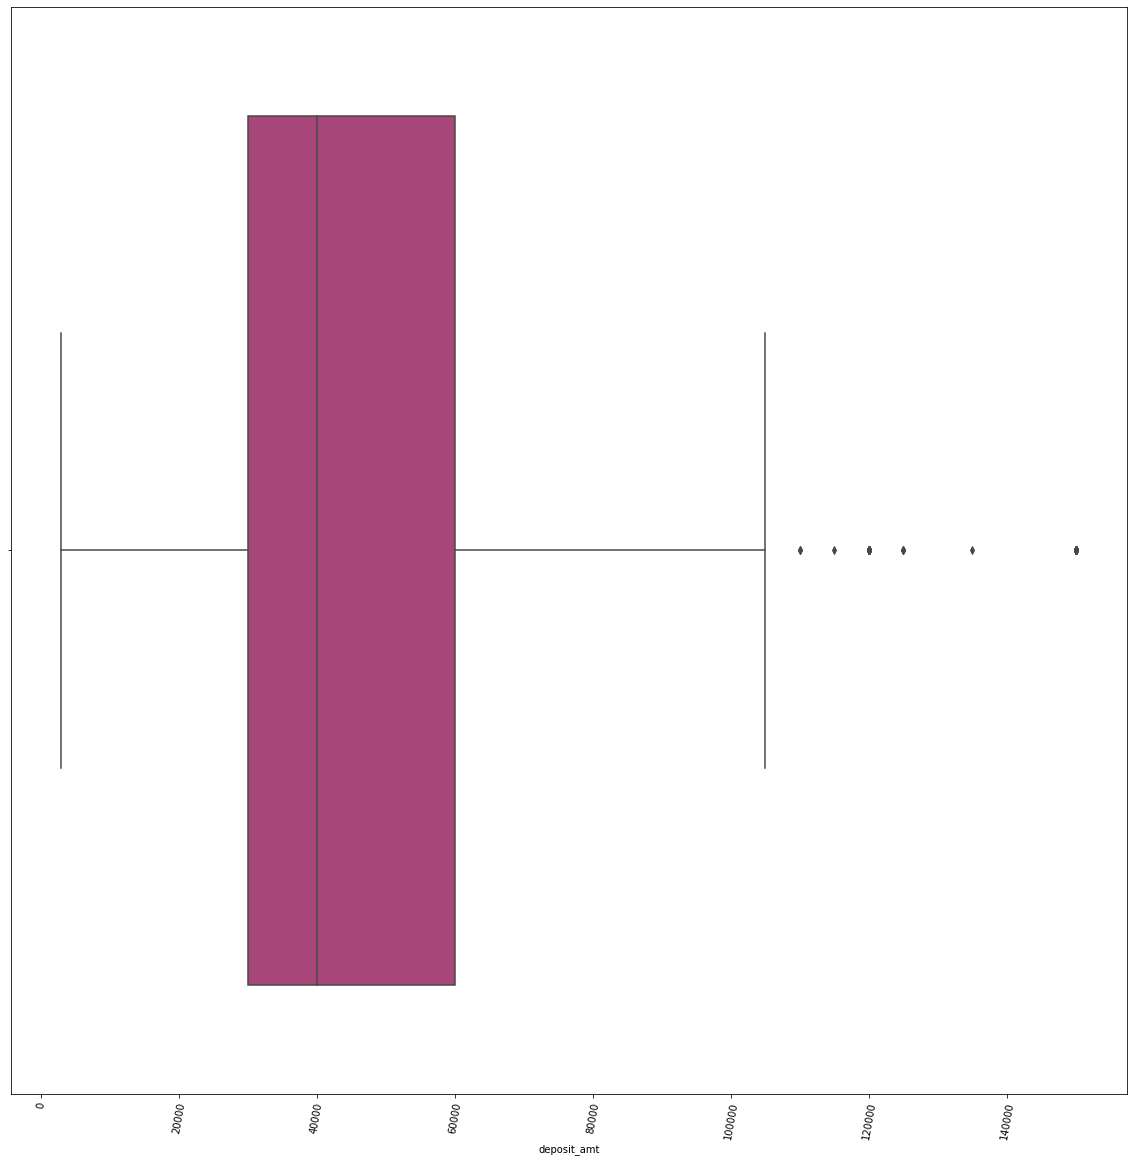

In [30]:
plt.figure(figsize=(20,20))
sns.boxplot(x=new_df.deposit_amt,orient="v",palette="magma")
plt.xticks(rotation=80)

(array([  2.,   7.,   1.,   2.,  17.,   1.,   4.,   2.,  85.,   2.,   5.,
        195.,   5.,   0., 250.,   0.,   5.,   2., 391.,   2.,   4., 136.,
         16.,   1.,   5., 325.,   5.,   1.,  92.,   0.,   4., 540.,   1.,
          0.,   3.,  18.,   2.,   0., 241.,   0.,   1.,   0.,  27.,   0.,
          0.,  50.,   3.,   0., 111.,   0.,   0.,   0.,  63.,   0.,   0.,
          3.,   0.,   0.,   0.,  27.,   0.,   0.,   1.,   0.,   0., 142.,
          0.,   0.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   0.,   1.,
          0.,   0.,  19.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         20.]),
 array([  3000.,   4470.,   5940.,   7410.,   8880.,  10350.,  11820.,
         13290.,  14760.,  16230.,  17700.,  19170.,  20640.,  22110.,
         23580.,  25050.,  26520.,  27990.,  29460.,  30930.,  32400.,
         33870.,  35340.,  36810.,  38280.,  39750.,  41220.,  42690.,
         44160.,  45630.,  47100.,

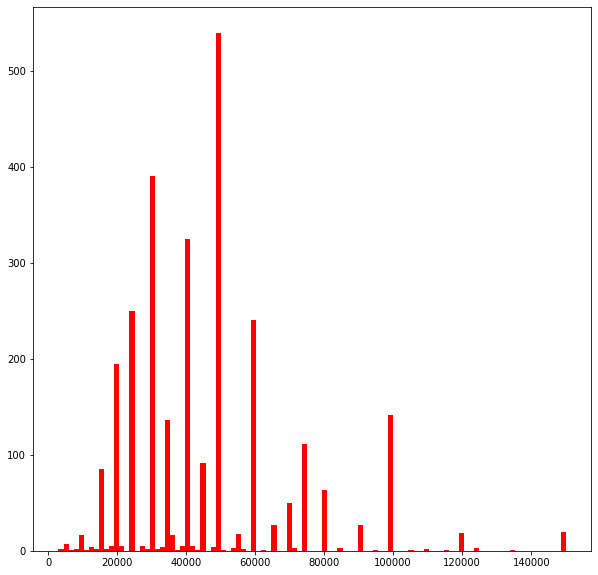

In [31]:
plt.figure(figsize=(10,10))
plt.hist(new_df.deposit_amt,bins=100,color="red")

(array([2.452e+03, 1.140e+02, 8.400e+01, 7.500e+01, 5.200e+01, 2.000e+01,
        1.700e+01, 8.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 1.000e+00,
        6.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000., 10500., 11000., 11500.,
        12000., 12500., 13000., 13500., 14000., 14500., 15000., 15500.,
        16000., 16500., 17000., 17500., 18000., 18500., 19000., 19500.,
        20000., 

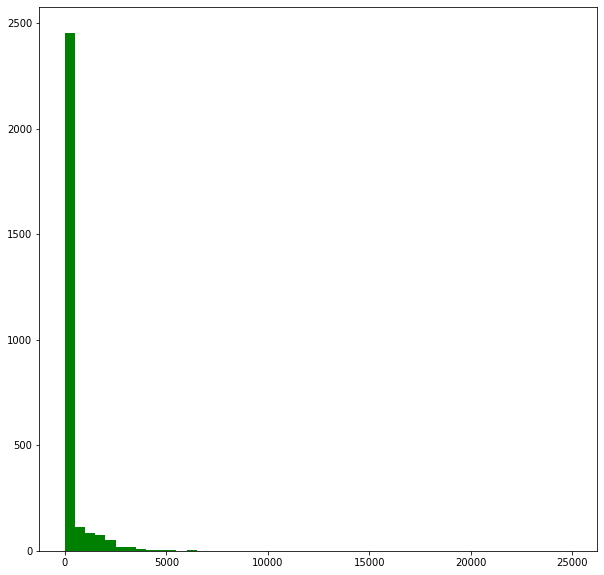

In [32]:
plt.figure(figsize=(10,10))
plt.hist(new_df["mnt_amt"],bins=50,color="green")

(array([0, 1, 2]),
 [Text(0, 0, 'Unfurnished'),
  Text(1, 0, 'Furnished'),
  Text(2, 0, 'Semifurnished')])

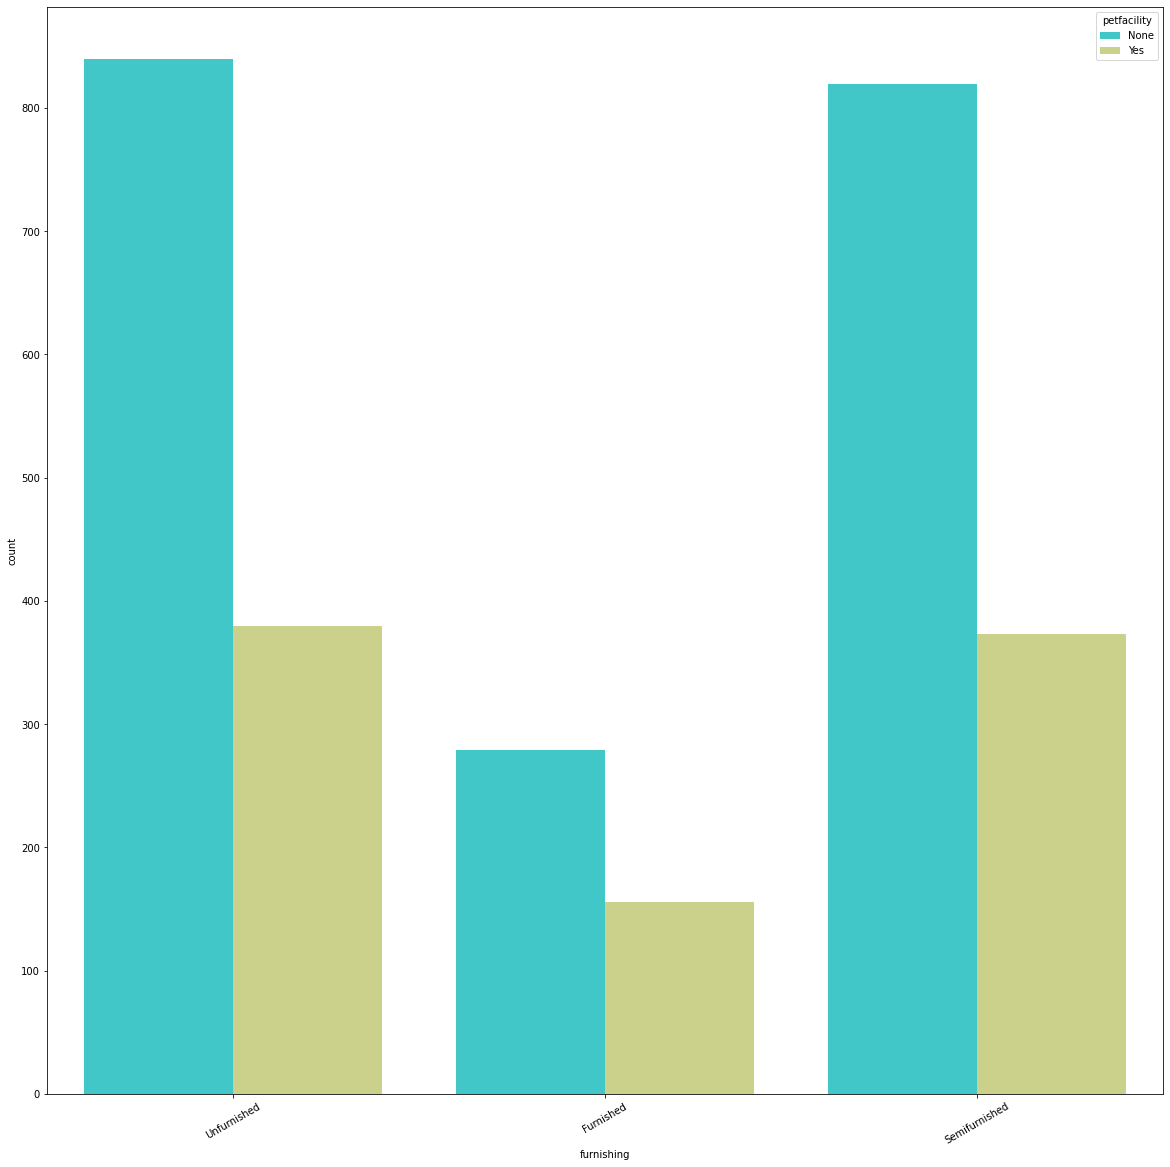

In [33]:
plt.figure(figsize=(20,20))
sns.countplot(x=new_df.furnishing,hue=new_df.petfacility,orient="v",palette="rainbow")
plt.xticks(rotation=30)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

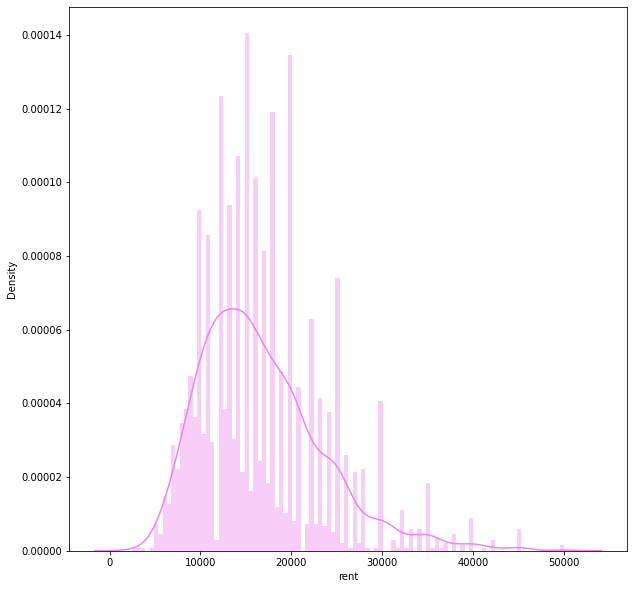

In [34]:
plt.figure(figsize=(10,10))
sns.distplot(new_df.rent,color="violet",bins=100,kde=True)

In [35]:
lower_limit = np.mean(new_df.rent) - 2*np.std(new_df.rent)
upper_limit = np.mean(new_df.rent) + 2*np.std(new_df.rent)
print(lower_limit,upper_limit)
new_df = new_df[(new_df.rent>lower_limit) & (new_df.rent<upper_limit)]
new_df.shape

3138.7626964935826 30290.75398773543


(2738, 24)

<AxesSubplot:>

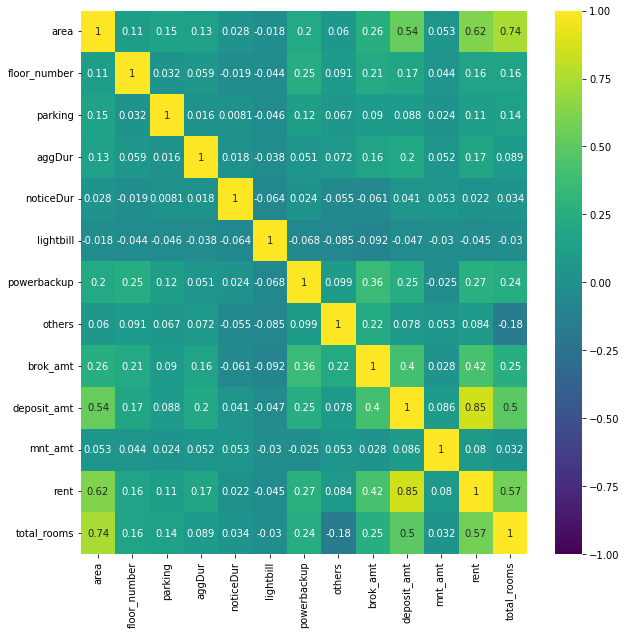

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),vmax=1,vmin=-1,annot=True,cmap="viridis")

In [37]:
corrmat = new_df.corr()
corrmat

,area,floor_number,parking,aggDur,noticeDur,lightbill,powerbackup,others,brok_amt,deposit_amt,mnt_amt,rent,total_rooms
area,1.000000,0.108177,0.151825,0.131789,0.027916,-0.018436,0.204652,0.060297,0.258708,0.538317,0.053210,0.618914,0.737263
floor_number,0.108177,1.000000,0.032019,0.058925,-0.019392,-0.043891,0.247025,0.091305,0.210489,0.173379,0.043907,0.159709,0.162061
parking,0.151825,0.032019,1.000000,0.015733,0.008123,-0.045709,0.118387,0.066975,0.090247,0.087697,0.023592,0.110827,0.137880
aggDur,0.131789,0.058925,0.015733,1.000000,0.017565,-0.038441,0.050812,0.071763,0.160158,0.199108,0.052463,0.173847,0.088601
noticeDur,0.027916,-0.019392,0.008123,0.017565,1.000000,-0.063938,0.023606,-0.055113,-0.060964,0.041471,0.052530,0.022470,0.034373
lightbill,-0.018436,-0.043891,-0.045709,-0.038441,-0.063938,1.000000,-0.067518,-0.085037,-0.091548,-0.047230,-0.029572,-0.045459,-0.029828
powerbackup,0.204652,0.247025,0.118387,0.050812,0.023606,-0.067518,1.000000,0.098759,0.358066,0.247639,-0.025020,0.268920,0.243253
others,0.060297,0.091305,0.066975,0.071763,-0.055113,-0.085037,0.098759,1.000000,0.218349,0.077759,0.052569,0.083516,-0.176627
brok_amt,0.258708,0.210489,0.090247,0.160158,-0.060964,-0.091548,0.358066,0.218349,1.000000,0.400736,0.028272,0.421482,0.254159
deposit_amt,0.538317,0.173379,0.087697,0.199108,0.041471,-0.047230,0.247639,0.077759,0.400736,1.000000,0.086401,0.853916,0.495104


In [38]:
l1,l2=list(),list()
for ele in new_df.columns:
    l1.append(ele)
    l2.append(len(new_df[ele].unique()))
dict1 = {'Numeric_column':l1,"Count_of_unique_vals":l2}
num_uniq = pd.DataFrame(dict1)
num_uniq

,Numeric_column,Count_of_unique_vals
0,area,456
1,furnishing,3
2,avalable_for,7
3,address,2005
4,floor_number,10
5,facing,9
6,floor_type,15
7,gate_community,2
8,corner_pro,2
9,parking,7


In [39]:
## cat_cols
#cat_cols.remove("address")
for ele in cat_cols:
    print("\n{} has these many values\n {}\n".format(ele,new_df[ele].value_counts()))


furnishing has these many values
 Unfurnished      1208
Semifurnished    1149
Furnished         381
Name: furnishing, dtype: int64


avalable_for has these many values
 All                                1372
Family Only                        1111
Family , Bachelors (Women Only)     138
Family , Bachelors (Men Only)        71
Bachelors (Men/Women)                16
Bachelors (Men Only)                 16
Bachelors (Women Only)               14
Name: avalable_for, dtype: int64


address has these many values
 Paranjape Blue Ridge, Hinjewadi, , Pune, Maharashtra         25
Kolte Patil Western Avenue, Wakad, , Pune, Maharashtra       20
Kolte Patil Life Republic, Hinjewadi, , Pune, Maharashtra    14
Duville Riverdale Heights, Kharadi, , Pune, Maharashtra      13
Pristine Prolife, Wakad, , Pune, Maharashtra                 12
                                                             ..
Shree Ganesh Residency, Dhayari, , Pune, Maharashtra          1
Kumar Prerana, Aundh, , Pune, Mahara

In [40]:
## new_df = new_df.drop(["address"],axis=1)
address_list = list(new_df["address"].values)
address_list[0]
loc_list=[]
for ele in address_list:
    loc_list.append(ele.split(",")[1].lstrip())
new_df["location"] = np.array(loc_list)


In [41]:
new_df.drop(["address"],axis=1,inplace=True)

In [42]:
new_df.head()

,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,total_rooms,location
1,760.0,Unfurnished,All,5,East,Vitrified,Yes,Yes,2,None,None,11,1,0,2,1 to 5 Year Old,0,0,0,40000,0.0,14000.0,5,Wagholi
3,628.0,Furnished,Family Only,3,East,Mosaic,Yes,No,1,None,None,11,1,0,0,10+ Year Old,0,0,0,40000,0.0,13000.0,3,Wanowrie
5,950.0,Semifurnished,Family Only,1,No Direction,Ceramic,No,No,1,None,None,11,1,1,2,1 to 5 Year Old,0,0,0,50000,0.0,17000.0,5,Baner
18,836.0,Unfurnished,All,8,North-East,Not provided,Yes,Yes,0,None,None,12,2,0,0,10+ Year Old,0,0,0,72000,0.0,13000.0,5,Katraj Kondhwa Road
20,1350.0,Semifurnished,Family Only,1,No Direction,Vitrified,Yes,No,1,None,Yes,11,1,0,0,1 to 5 Year Old,0,0,0,100000,0.0,27000.0,7,Hinjewadi


In [43]:
new_df["facing"].replace(to_replace="No Direction",value=df["facing"].mode()[0],inplace=True)
new_df["propertyage"].replace(to_replace="NO age",value=df["propertyage"].mode()[0],inplace=True)

In [44]:
#Graph based statistics for categorical features
print(cat_cols)

['furnishing', 'avalable_for', 'address', 'facing', 'floor_type', 'gate_community', 'corner_pro', 'wheelchairadption', 'petfacility', 'propertyage', 'maintenance_amt']


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='furnishing', ylabel='count'>

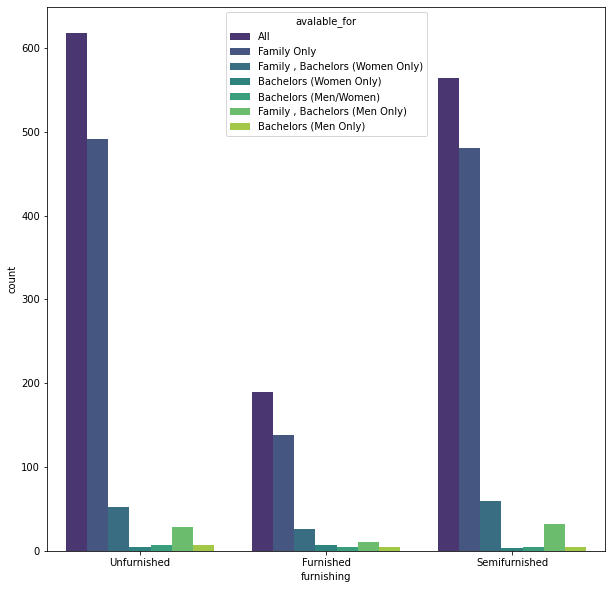

In [45]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.furnishing,palette="viridis",hue=new_df.avalable_for)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='facing', ylabel='count'>

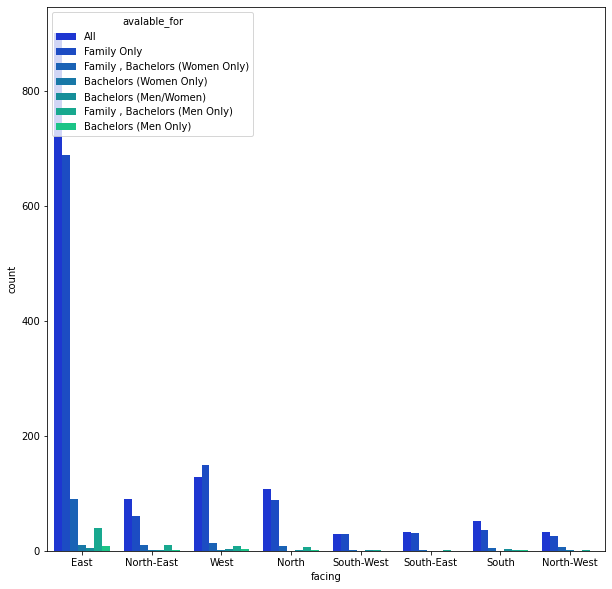

In [46]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.facing,palette="winter",hue=new_df.avalable_for)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Vitrified'),
  Text(1, 0, 'Mosaic'),
  Text(2, 0, 'Ceramic'),
  Text(3, 0, 'Not provided'),
  Text(4, 0, 'Marble'),
  Text(5, 0, 'Granite'),
  Text(6, 0, 'Polished concrete'),
  Text(7, 0, 'Others'),
  Text(8, 0, 'Wood'),
  Text(9, 0, 'Spartex'),
  Text(10, 0, 'Concrete'),
  Text(11, 0, 'Stone'),
  Text(12, 0, 'Cement'),
  Text(13, 0, 'Vinyl'),
  Text(14, 0, 'IPSFinish')])

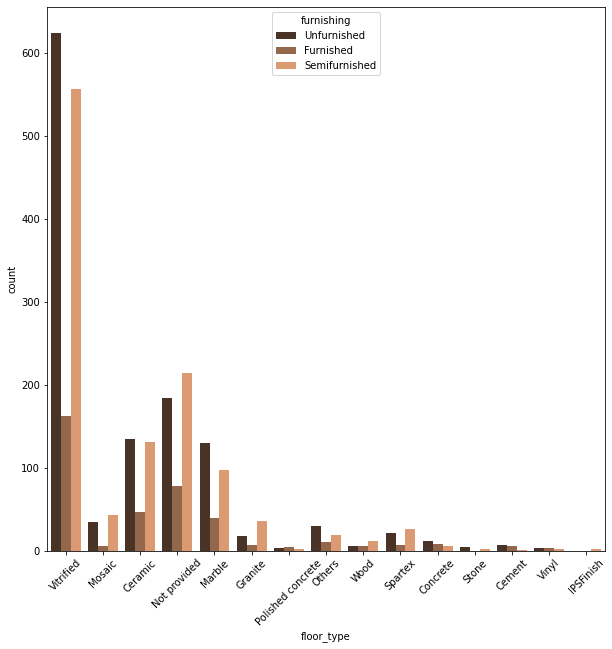

In [47]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.floor_type,palette="copper",orient="v",hue=new_df.furnishing)
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='propertyage', ylabel='count'>

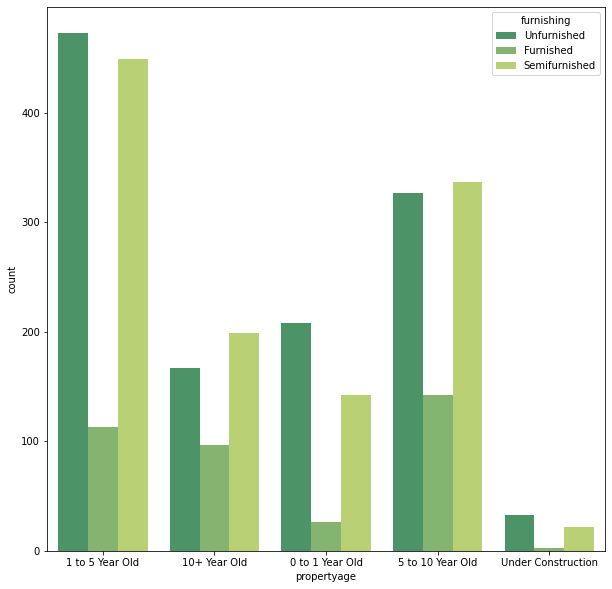

In [48]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.propertyage,palette="summer",hue=new_df.furnishing)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'All'),
  Text(1, 0, 'Family Only'),
  Text(2, 0, 'Family , Bachelors (Women Only)'),
  Text(3, 0, 'Bachelors (Women Only)'),
  Text(4, 0, 'Bachelors (Men/Women)'),
  Text(5, 0, 'Family , Bachelors (Men Only)'),
  Text(6, 0, 'Bachelors (Men Only)')])

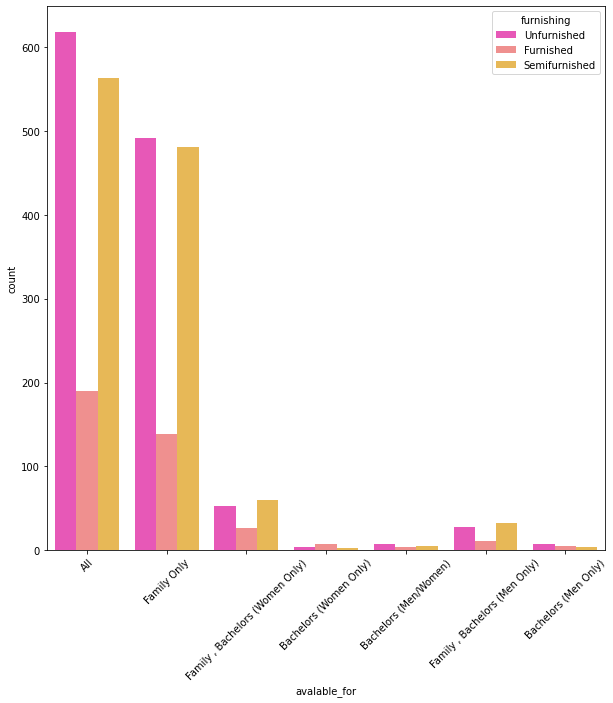

In [49]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.avalable_for,palette="spring",hue=new_df.furnishing,orient="h")
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'All'),
  Text(1, 0, 'Family Only'),
  Text(2, 0, 'Family , Bachelors (Women Only)'),
  Text(3, 0, 'Bachelors (Women Only)'),
  Text(4, 0, 'Bachelors (Men/Women)'),
  Text(5, 0, 'Family , Bachelors (Men Only)'),
  Text(6, 0, 'Bachelors (Men Only)')])

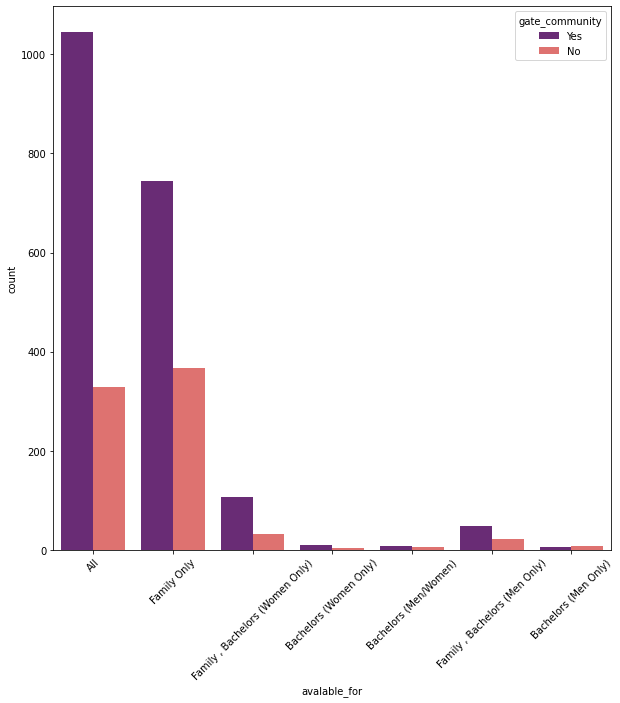

In [50]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.avalable_for,palette="magma",hue=new_df.gate_community)
plt.xticks(rotation=45)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'All'),
  Text(1, 0, 'Family Only'),
  Text(2, 0, 'Family , Bachelors (Women Only)'),
  Text(3, 0, 'Bachelors (Women Only)'),
  Text(4, 0, 'Bachelors (Men/Women)'),
  Text(5, 0, 'Family , Bachelors (Men Only)'),
  Text(6, 0, 'Bachelors (Men Only)')])

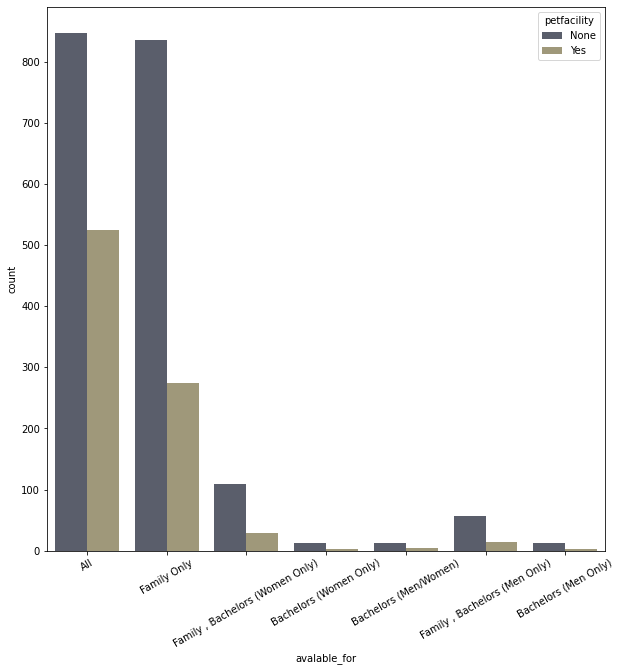

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(new_df.avalable_for,palette="cividis",hue=new_df.petfacility)
plt.xticks(rotation=30)

In [52]:
new_df["facing"] = new_df["facing"].replace(to_replace="South-East",value="South",inplace=True)
new_df["facing"] = new_df["facing"].replace(to_replace="South-West",value="South",inplace=True)
new_df["facing"] = new_df["facing"].replace(to_replace="North-East",value="North",inplace=True)
new_df["facing"] = new_df["facing"].replace(to_replace="North-West",value="North",inplace=True)

In [53]:
new_df.head()

,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent,total_rooms,location
1,760.0,Unfurnished,All,5,None,Vitrified,Yes,Yes,2,None,None,11,1,0,2,1 to 5 Year Old,0,0,0,40000,0.0,14000.0,5,Wagholi
3,628.0,Furnished,Family Only,3,None,Mosaic,Yes,No,1,None,None,11,1,0,0,10+ Year Old,0,0,0,40000,0.0,13000.0,3,Wanowrie
5,950.0,Semifurnished,Family Only,1,None,Ceramic,No,No,1,None,None,11,1,1,2,1 to 5 Year Old,0,0,0,50000,0.0,17000.0,5,Baner
18,836.0,Unfurnished,All,8,None,Not provided,Yes,Yes,0,None,None,12,2,0,0,10+ Year Old,0,0,0,72000,0.0,13000.0,5,Katraj Kondhwa Road
20,1350.0,Semifurnished,Family Only,1,None,Vitrified,Yes,No,1,None,Yes,11,1,0,0,1 to 5 Year Old,0,0,0,100000,0.0,27000.0,7,Hinjewadi


In [54]:
new_df["floor_type"] = new_df["floor_type"].replace(to_replace="Not provided",
                                                    value=new_df["floor_type"].mode()[0],inplace=True)

In [55]:
new_df.location.value_counts()[:15]

Wagholi                161
Wakad                  132
Hinjewadi              115
Hadapsar                72
                        67
Baner                   65
Kharadi                 59
Aundh                   49
Pimple Saudagar         48
Shankar Kalat Nagar     46
NIBM                    46
Ravet                   43
Undri                   42
Bavdhan                 42
Punawale                39
Name: location, dtype: int64

In [56]:
loc_mean = new_df.groupby(new_df.location)["rent"].mean()
#print(loc_mean.values)
l1,l2 = list(loc_mean.index),list(loc_mean.values)
new_df["location_encoded"] = new_df["location"].replace(to_replace=l1,value=l2)
new_df.location_encoded.head(5)

1     12367.670807
3     21980.000000
5     21122.969231
18    13500.000000
20    15552.356522
Name: location_encoded, dtype: float64

In [57]:
new_df.drop("location",axis=1,inplace=True)
new_df_copy = new_df.copy()

In [58]:
directions ={"East":1,"West":2,"North":3,"South":4}
new_df_copy["facing"] = new_df_copy["facing"].map(directions)

In [59]:
# Frequency encoding for Monthly Amount Feature 
fe = new_df_copy.groupby('mnt_amt').size()/len(new_df_copy)
new_df_copy["mnt_amt_encoded"] = new_df_copy["mnt_amt"].map(fe)
new_df_copy.drop(["mnt_amt"],axis=1,inplace=True)
new_df_copy.head(4)

,area,furnishing,avalable_for,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded
1,760.0,Unfurnished,All,5,NaN,None,Yes,Yes,2,None,None,11,1,0,2,1 to 5 Year Old,0,0,0,40000,14000.0,5,12367.670807,0.788897
3,628.0,Furnished,Family Only,3,NaN,None,Yes,No,1,None,None,11,1,0,0,10+ Year Old,0,0,0,40000,13000.0,3,21980.000000,0.788897
5,950.0,Semifurnished,Family Only,1,NaN,None,No,No,1,None,None,11,1,1,2,1 to 5 Year Old,0,0,0,50000,17000.0,5,21122.969231,0.788897
18,836.0,Unfurnished,All,8,NaN,None,Yes,Yes,0,None,None,12,2,0,0,10+ Year Old,0,0,0,72000,13000.0,5,13500.000000,0.788897


In [60]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'floor_type' and maintenance_amount features.
new_df_copy['floor_type']= label_encoder.fit_transform(new_df_copy['floor_type'])
new_df_copy['maintenance_amt']= label_encoder.fit_transform(new_df_copy['maintenance_amt'])  

In [61]:
dict2 = {"Unfurnished":0,"Semifurnished":1,"Furnished":2}
new_df_copy["furnishing"] = new_df_copy["furnishing"].map(dict2)
new_df_copy.furnishing.head(3)

1    0
3    2
5    1
Name: furnishing, dtype: int64

In [62]:
# Frequency encoding for Available_for Feature 
fe = new_df_copy.groupby('avalable_for').size()/len(new_df_copy)
new_df_copy["avalable_for_encoded"] = new_df_copy["avalable_for"].map(fe)
new_df_copy.drop(["avalable_for"],axis=1,inplace=True)
new_df_copy.head(4)

,area,furnishing,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
1,760.0,0,5,NaN,0,Yes,Yes,2,None,None,11,1,0,2,1 to 5 Year Old,0,0,0,40000,14000.0,5,12367.670807,0.788897,0.501096
3,628.0,2,3,NaN,0,Yes,No,1,None,None,11,1,0,0,10+ Year Old,0,0,0,40000,13000.0,3,21980.000000,0.788897,0.405771
5,950.0,1,1,NaN,0,No,No,1,None,None,11,1,1,2,1 to 5 Year Old,0,0,0,50000,17000.0,5,21122.969231,0.788897,0.405771
18,836.0,0,8,NaN,0,Yes,Yes,0,None,None,12,2,0,0,10+ Year Old,0,0,0,72000,13000.0,5,13500.000000,0.788897,0.501096


In [63]:
#Label encoding for features like gate_community,pet facility,wheel chair availability and corner_pro
dict3 = {'Yes':1,"No":0,"None":0}
new_df_copy["gate_community"] = new_df_copy["gate_community"].map(dict3)
new_df_copy["corner_pro"] = new_df_copy["corner_pro"].map(dict3)
new_df_copy["wheelchairadption"] = new_df_copy["wheelchairadption"].map(dict3)
new_df_copy["petfacility"] = new_df_copy["petfacility"].map(dict3)
new_df_copy.head(3)

,area,furnishing,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
1,760.0,0,5,NaN,0,1,1,2,0,0,11,1,0,2,1 to 5 Year Old,0,0,0,40000,14000.0,5,12367.670807,0.788897,0.501096
3,628.0,2,3,NaN,0,1,0,1,0,0,11,1,0,0,10+ Year Old,0,0,0,40000,13000.0,3,21980.000000,0.788897,0.405771
5,950.0,1,1,NaN,0,0,0,1,0,0,11,1,1,2,1 to 5 Year Old,0,0,0,50000,17000.0,5,21122.969231,0.788897,0.405771


In [64]:
#new_df_copy.propertyage.value_counts()
dict1 = {
    "Under Construction":0,
    "0 to 1 Year Old":1,
    "1 to 5 Year Old":2,
    "5 to 10 Year Old":3,
    "10+ Year Old":4
}
new_df_copy.propertyage = new_df_copy.propertyage.map(dict1)
new_df_copy.head(5)

,area,furnishing,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
1,760.0,0,5,NaN,0,1,1,2,0,0,11,1,0,2,2,0,0,0,40000,14000.0,5,12367.670807,0.788897,0.501096
3,628.0,2,3,NaN,0,1,0,1,0,0,11,1,0,0,4,0,0,0,40000,13000.0,3,21980.000000,0.788897,0.405771
5,950.0,1,1,NaN,0,0,0,1,0,0,11,1,1,2,2,0,0,0,50000,17000.0,5,21122.969231,0.788897,0.405771
18,836.0,0,8,NaN,0,1,1,0,0,0,12,2,0,0,4,0,0,0,72000,13000.0,5,13500.000000,0.788897,0.501096
20,1350.0,1,1,NaN,0,1,0,1,0,1,11,1,0,0,2,0,0,0,100000,27000.0,7,15552.356522,0.788897,0.405771


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


1     10.596635
3     10.596635
5     10.819778
18    11.184421
20    11.512925
Name: deposit_amt, dtype: float64

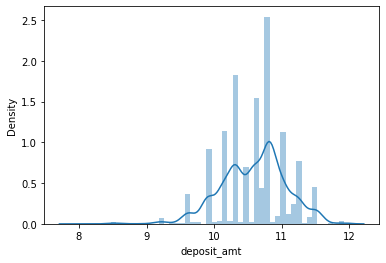

In [65]:
sns.distplot(np.log(new_df_copy.deposit_amt))
new_df_copy["deposit_amt"] = np.log(new_df_copy.deposit_amt)
new_df_copy.deposit_amt.head(5)

In [66]:
new_df_copy.reset_index(inplace=True)
new_df_copy.head()

,index,area,furnishing,floor_number,facing,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
0,1,760.0,0,5,NaN,0,1,1,2,0,0,11,1,0,2,2,0,0,0,10.596635,14000.0,5,12367.670807,0.788897,0.501096
1,3,628.0,2,3,NaN,0,1,0,1,0,0,11,1,0,0,4,0,0,0,10.596635,13000.0,3,21980.000000,0.788897,0.405771
2,5,950.0,1,1,NaN,0,0,0,1,0,0,11,1,1,2,2,0,0,0,10.819778,17000.0,5,21122.969231,0.788897,0.405771
3,18,836.0,0,8,NaN,0,1,1,0,0,0,12,2,0,0,4,0,0,0,11.184421,13000.0,5,13500.000000,0.788897,0.501096
4,20,1350.0,1,1,NaN,0,1,0,1,0,1,11,1,0,0,2,0,0,0,11.512925,27000.0,7,15552.356522,0.788897,0.405771


In [67]:
new_df_copy.drop(["index","facing"],inplace=True,axis=1)

In [69]:
final_df = new_df_copy.copy()
final_csv =final_df.to_csv("Final_processed_dataset.csv")

In [70]:
# MinMax Scaler is used for normalizing the feature space
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(new_df_copy)

In [71]:
scaled_df = pd.DataFrame(data=scaled_data,columns=new_df_copy.columns)
scaled_df.head()

,area,furnishing,floor_number,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,rent,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
0,0.121224,0.0,0.555556,0.0,1.0,1.0,0.333333,0.0,0.0,0.454545,0.166667,0.0,1.0,0.5,0.0,0.0,0.0,0.662130,0.396226,0.428571,0.334629,1.0,1.000000
1,0.069439,1.0,0.333333,0.0,1.0,0.0,0.166667,0.0,0.0,0.454545,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.662130,0.358491,0.142857,0.697358,1.0,0.807806
2,0.195763,0.5,0.111111,0.0,0.0,0.0,0.166667,0.0,0.0,0.454545,0.166667,1.0,1.0,0.5,0.0,0.0,0.0,0.719170,0.509434,0.428571,0.665018,1.0,0.807806
3,0.151040,0.0,0.888889,0.0,1.0,1.0,0.000000,0.0,0.0,0.500000,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.812381,0.358491,0.428571,0.377358,1.0,1.000000
4,0.352687,0.5,0.111111,0.0,1.0,0.0,0.166667,0.0,1.0,0.454545,0.166667,0.0,0.0,0.5,0.0,0.0,0.0,0.896354,0.886792,0.714286,0.454806,1.0,0.807806


In [72]:
X_train = scaled_df.drop(["rent"],axis=1)
X_train.head(3)

,area,furnishing,floor_number,floor_type,gate_community,corner_pro,parking,wheelchairadption,petfacility,aggDur,noticeDur,lightbill,powerbackup,propertyage,others,maintenance_amt,brok_amt,deposit_amt,total_rooms,location_encoded,mnt_amt_encoded,avalable_for_encoded
0,0.121224,0.0,0.555556,0.0,1.0,1.0,0.333333,0.0,0.0,0.454545,0.166667,0.0,1.0,0.5,0.0,0.0,0.0,0.66213,0.428571,0.334629,1.0,1.000000
1,0.069439,1.0,0.333333,0.0,1.0,0.0,0.166667,0.0,0.0,0.454545,0.166667,0.0,0.0,1.0,0.0,0.0,0.0,0.66213,0.142857,0.697358,1.0,0.807806
2,0.195763,0.5,0.111111,0.0,0.0,0.0,0.166667,0.0,0.0,0.454545,0.166667,1.0,1.0,0.5,0.0,0.0,0.0,0.71917,0.428571,0.665018,1.0,0.807806


In [73]:
y_train = scaled_df.loc[:,"rent"]
y_train.head()

0    0.396226
1    0.358491
2    0.509434
3    0.358491
4    0.886792
Name: rent, dtype: float64

In [74]:
#Faking the train_test_split on the training data itself and perform model creation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [75]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_train,y_train,test_size=0.3,random_state=0)

dt_reg = DecisionTreeRegressor()

In [76]:
lin_reg = LinearRegression()
lin_reg.fit(X_train1,y_train1)

LinearRegression()

In [77]:
y_lin_pred = lin_reg.predict(X_test1)
print(r2_score(y_test1,y_lin_pred))
print(mean_squared_error(y_test1,y_lin_pred))
print(mean_absolute_error(y_test1,y_lin_pred))

0.8286751180700317
0.007563703692361604
0.06667576582467627


*Ridge regressor with hyperparameter tuning*

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
grid_params ={
    "alpha":[0.1,0.001,0.25,0.5,0.005],
    "solver":["auto","svd","cholesky","lsqr","sparse_cg","sag","saga"]
}


In [80]:
ridge_model = Ridge()
grid_ridge = GridSearchCV(ridge_model,param_grid=grid_params,scoring="neg_mean_squared_error",cv=10,verbose=2)
grid_ridge.fit(X_train1,y_train1)

Fitting 10 folds for each of 35 candidates, totalling 350 fits
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END .............................alpha=0.1, solver=auto; total time=   0.0s
[CV] END ..............................alpha=0.1, solver=svd; total time=   0.0s
[CV] END ..............................alpha=0

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.001, 0.25, 0.5, 0.005],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag', 'saga']},
             scoring='neg_mean_squared_error', verbose=2)

In [81]:
y_lin_pred = grid_ridge.predict(X_test1)
print(r2_score(y_test1,y_lin_pred))
print(mean_squared_error(y_test1,y_lin_pred))
print(mean_absolute_error(y_test1,y_lin_pred))

0.8286228384664966
0.007566011748411834
0.06669672164425748


*Random forest regressor*

In [82]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train1,y_train1)
y_rf_pred = rf_reg.predict(X_test1)
print(r2_score(y_test1,y_rf_pred))
print(mean_squared_error(y_test1,y_rf_pred))
print(mean_absolute_error(y_test1,y_rf_pred))

0.868718856122514
0.00579584040273548
0.0528678723469372


*Hyperparameter tuning for Random Forest Regressor*

In [83]:
grid_params = {
    "n_estimators":[100],
     "criterion":["mse","mae"],
    "max_depth": [2,5,10],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [2,5,10]
}

In [84]:
grid_rf = GridSearchCV(rf_reg,param_grid=grid_params,verbose=2,cv=10,scoring="neg_median_absolute_error")
grid_rf.fit(X_train1,y_train1)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   0.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mse, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   4.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   3.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   3.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   6.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   6.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   5.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   8.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   8.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   7.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.7s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   7.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   7.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   5.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.8s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.3s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.9s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=5, n_estimators=100; total time=   6.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.2s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.0s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.6s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.1s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.5s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   6.4s


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:407: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100]},
             scoring='neg_median_absolute_error', verbose=2)

In [85]:
grid_rf.best_params_

{'criterion': 'mae',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [86]:
y_rf_pred = grid_rf.predict(X_test1)
print(r2_score(y_test1,y_rf_pred))
print(mean_squared_error(y_test1,y_rf_pred))
print(mean_absolute_error(y_test1,y_rf_pred))

0.864482529901071
0.005982867038459498
0.05320633360877749


*Decision Tree Regressor*

In [87]:
dt_reg.fit(X_train1,y_train1)
y_dt_pred = dt_reg.predict(X_test1)
print(r2_score(y_test1,y_dt_pred))
print(mean_squared_error(y_test1,y_dt_pred))
print(mean_absolute_error(y_test1,y_dt_pred))

0.7211146720168842
0.012312315416470695
0.07587494835422119


*Hyperparameter tuning for Decision Tree Regressor*

In [88]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    "criterion":["mse","mae","friedman_mse"],
    "max_depth": [2,5,10],
    "min_samples_split" : [2,5],
    "min_samples_leaf": [2,5]
}
grid_dt = GridSearchCV(dt_reg,param_grid=grid_params,scoring="neg_mean_squared_error",
                       cv=10,verbose=2)
grid_dt.fit(X_train1,y_train1)


Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=2, min_sam

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_de

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_de

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.0s
[CV] END criterion=m

/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mse, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:363: FutureWarning: 

[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarni

[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=2, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=5, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.2s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.2s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=2; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s


/opt/conda/lib/python3.7/site-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


[CV] END criterion=mae, max_depth=10, min_samples_leaf=5, min_samples_split=5; total time=   0.1s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=friedman_mse, max_depth=2, min_samp

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'friedman_mse'],
                         'max_depth': [2, 5, 10], 'min_samples_leaf': [2, 5],
                         'min_samples_split': [2, 5]},
             scoring='neg_mean_squared_error', verbose=2)

In [89]:
grid_dt.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2}

In [90]:
y_dt_pred = grid_dt.predict(X_test1)
print(r2_score(y_test1,y_dt_pred))
print(mean_squared_error(y_test1,y_dt_pred))
print(mean_absolute_error(y_test1,y_dt_pred))

0.7945996108651616
0.009068079687028417
0.06807243491859409


*SVR Regressor with hyperparameter tuning*

In [94]:
from sklearn.svm import SVR
grid_params ={
    "kernel":["rbf","linear","poly"], 
    "degree":[3],
    "C":[1,2,5,10,50,100], 
    "epsilon":[0.1]
    
}
svr_model = SVR()
grid_svr = GridSearchCV(svr_model,param_grid=grid_params,scoring="neg_mean_squared_error",cv=10,
                        verbose=2)
grid_svr.fit(X_train1,y_train1)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.2s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.1s
[CV] END .............C=1, degree=3, epsilon=0.1, kernel=rbf; total time=   0.1s
[CV] END ..........C=1, degree=3, epsilon=0.1, kernel=linear; total time=   0.1s
[CV] END ..........C=1, degree=3, epsilon=0.1,

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 2, 5, 10, 50, 100], 'degree': [3],
                         'epsilon': [0.1],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error', verbose=2)

In [95]:
grid_svr.best_params_

{'C': 1, 'degree': 3, 'epsilon': 0.1, 'kernel': 'linear'}

In [96]:
y_svr_pred = grid_svr.predict(X_test1)
print(r2_score(y_test1,y_svr_pred))
print(mean_squared_error(y_test1,y_svr_pred))
print(mean_absolute_error(y_test1,y_svr_pred))

0.8269122321626179
0.007641532122750183
0.06739546048959612


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

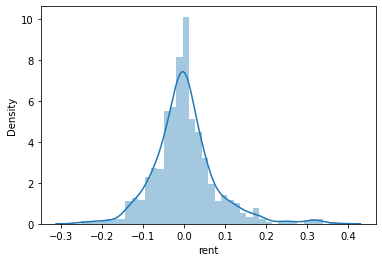

In [98]:
sns.distplot(y_test1-y_rf_pred)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

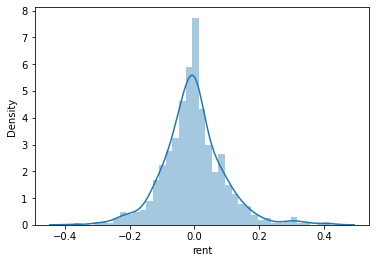

In [99]:
sns.distplot(y_test1-y_dt_pred)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rent', ylabel='Density'>

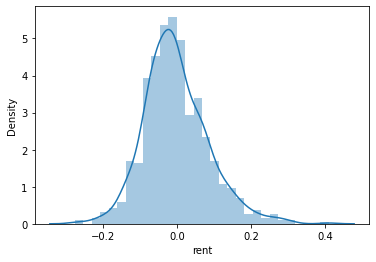

In [100]:
sns.distplot(y_test1-y_lin_pred)

In [ ]:
import pickle
file = open("rent_rf_grid_regressor_model.pkl","wb")
pickle.dump(grid_rf,file)